```
Equipo: 4                              Grupo: 012
Integrantes:
1834309, Rodríguez González, Selene Jazmín
1668598, Torres Estrada, Orlando
```

**1. Titulo de la base de datos:**
* Supermarket sales

**2. Descripción de los datos:**
>a) Esta BDD contiene una muestra de registros de tres locales de una cadena de tiendas. En ella se pueden observar datos como la opinión del cliente respecto al servicio brindado, tipo de producto comprado, horario en que se realizo la compra, genero del cliente, monto total de productos, entre otros. Contiene los registros obtenidos durante tres meses en tres de sus sucursales.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;
BDD_SM = pd.read_csv("supermarket_sales - Sheet1.csv")

Dimensiones de la BDD(columnas, filas):

In [4]:
BDD_SM.shape

(1000, 17)

Primeros registros de la BDD

In [5]:
BDD_SM.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Columna y tipo de dato

In [6]:
BDD_SM.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

**3. Justificación del uso de datos:**
>a) Las características que nos llamaron mas de esta BDD fue el hecho de que tiene variedad en los datos y esto permite que si nuestro objetivo principal no puede llevarse acabo por alguna circunstancia, podamos encontrar objetivos secundarios para trabajar. Ademas de que, tratandose de la BDD de una tienda, existen más áreas de oportunidad para trabajar.

>b) Debido a que a simple vista no se detectaron datos nulos y los resultados del análisis pueden resultar mejor si se cuenta con la mayoria o todos los datos.

**4. Mencionar los objetivos:**

>Principal:
>>Analizar la BDD para segmentar a los clientes en base a las compras generadas y de esta manera poder ofertarles promociones en base al segmento y generar fidelización de mas clientes.

>Secundario:
>>Identificar el porcentaje de clientes que pagan por medio de efectivo para determinar el tipo de descuentos/ofertas que se deberian implementar para promover el pago por medio de canales digitales.


### Desarrollo de las herramientas

**1. Limpieza de datos**

>a) Datos sin manipular

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt;

BDD_SM = pd.read_csv("supermarket_sales - Sheet1.csv")
BDD_SM.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


>b) Eliminando columnas no deseadas

          Se eliminan las siguientes columnas debido a que no aportan nada al análisis que estamos buscando realizar. 

In [8]:
BDD_SM=BDD_SM.drop(['cogs', 'gross income', 'gross margin percentage'] ,axis = 1)

>c) Correcta manipulación de datos nulos

          La primera comprobación es para ver si se encuentran datos nulos por registro y el siguiente es por columna.

In [9]:
BDD_SM.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
BDD_SM.isnull().any()

Invoice ID       False
Branch           False
City             False
Customer type    False
Gender           False
Product line     False
Unit price       False
Quantity         False
Tax 5%           False
Total            False
Date             False
Time             False
Payment          False
Rating           False
dtype: bool

In [11]:
BDD_SM.isnull().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

>d) Motivo por el que se modificó la BDD

          Como se menciono anteriormente, se eliminaron dichas columnas porque solo eran impuestos y ingresos brutos.

>e) Archivo de la nueva BDD

In [12]:
BDD_SM.to_csv('BDD_SM2.csv', index=False)

**2. Estadística básica de los datos**

          Datos básicos y de relación de los valores cuantitativos de la BDD.

In [13]:
BDD_SM2 = pd.read_csv("BDD_SM2.csv")
BDD_SM2.describe()

,Unit price,Quantity,Tax 5%,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


In [14]:
BDD_SM2.corr()

,Unit price,Quantity,Tax 5%,Total,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


          Promedio de las opiniones de los clientes

In [15]:
BDD_SM2['Rating'].mean()

6.972700000000003

**3. Gráficas**

>El siguiente gráfico muestra la correlación existente entre cada una de las variables cuantitativas en la BDD

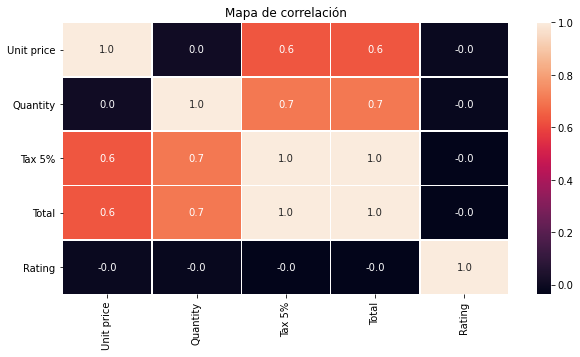

In [16]:
f,ax=plt.subplots(figsize = (10,5))
sns.heatmap(BDD_SM2.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
<plt.savefig('graph.png')
plt.show()

>Mientras se analizaban los datos de la BDD tambien se realizo una investigación respecto a cuales son las inconformidades mas  comunes en el proceso de pago y se detecto que recurrentemente se generan retrasos al momento de pagar en efectivo. En la siguiente gráfica se muestra el porcentaje de clientes que efectuan su pago por medios digitales(Ewallet y Credit card)

Text(0.5, 1.0, 'Metodos de pago')

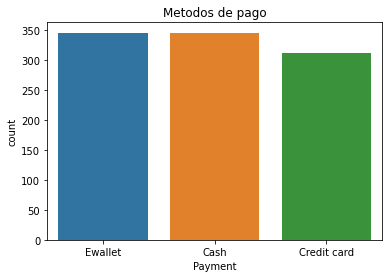

In [23]:
sns.countplot(x="Payment", data =BDD_SM2).set_title("Metodos de pago") 

>En el siguiente gráfico se puede observar que el pago por medio de efectivo es el más utilizado y dadas las circunstancias higiénicas actuales, se requiere minimizar el uso de efectivo.

Text(0.5, 1.0, 'Metodo de pago por sucursal')

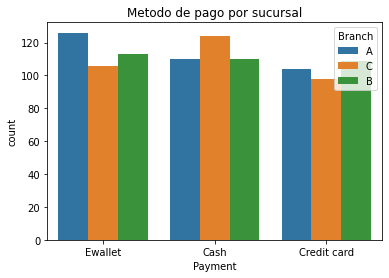

In [25]:
sns.countplot(x="Payment", hue = "Branch", data =BDD_SM2).set_title("Metodo de pago por sucursal") 

>Como se esta buscando promover el uso de los medios Ewellet y Credit card, el siguiente gráfico muestra los productos vendidos y si son mas populares entre hombres y mujeres, lo cual podría servir como base para establecer promociones o descuentos.

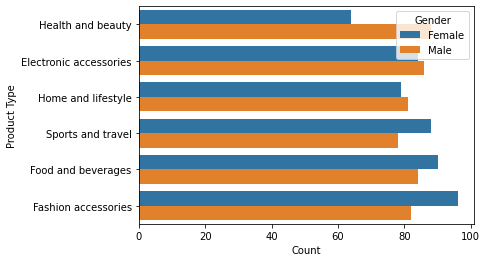

In [27]:
plt.figure
sns.countplot(y ='Product line', hue = "Gender", data = BDD_SM2) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

>La siguiente gráfica muestra la cantidad de ventas de los productos en cada una de las sucursales, lo que nos indica que cada una de ellas debe tener una promoción/descuento basado en sus ventas.

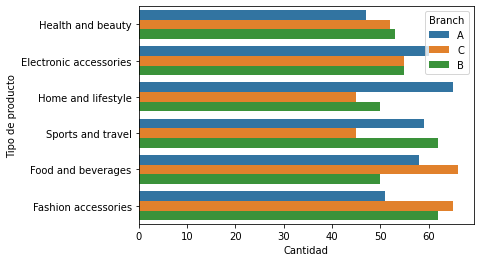

In [29]:
plt.figure
sns.countplot(y ='Product line', hue = "Branch", data = BDD_SM2) 
plt.xlabel('Cantidad')
plt.ylabel('Tipo de producto')
plt.show()

**4. Conclusión**

>Inicialmente buscabamos generar una predicción para poder saber cuando iba a haber mayor afluencia de clientela y programar la correcta cantidad de empleados, pero la BDD solo cuenta con datos de tres meses y esto no fue posible. 

>El objetivo de clusters todavía no se concreta porque se requiere aplicar el algoritmo y aun estamos trabajando en ello.

>Consideramos que el analisis referente a los metodos de pago va bien encaminado, e incluso, ya podría tomarse en consideración para establecer descuentos.
